<a href="https://colab.research.google.com/github/leobentes/data-science/blob/master/analyzing_airbnb_data__los_angeles.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Airbnb data analysis - Los Angeles - CA - USA

[Airbnb](https://www.airbnb.com/) is considered one of the largest (if not the largest) hosting companies in the world, even without owning a single property.

By connecting people who want to travel with real estate owners who want to rent their properties in a practical way, Airbnb provides an innovative platform to make this accommodation a viable alternative.

By the end of 2018, the company founded 10 years earlier, had already hosted more than 300 million people worldwide, challenging traditional hotel chains.

One of Airbnb's initiatives is to provide its data on some of the main cities in the world. Through the [Inside Airbnb](http://insideairbnb.com/get-the-data.html) portal, it is possible to download a large amount of data to develop data science projects and solutions.

Here, I’ll do a quick analysis of the data from the city of Los Angeles, focusing on **guest reviews vs location and price.**

Why Los Angeles? Because it's one of the most important cities in USA, center of the nation’s film and television industry and with tons of other attractions to experiment. Also as I've lived there for a couple of years I'm curious if data will support (or not) my perception about LA.


## Gathering the Data


In [0]:
# Import needed packages
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Create a dataframe based on detailed listings data for Los Angeles provided by Inside Airbnb
df = pd.read_csv('http://data.insideairbnb.com/united-states/ca/los-angeles/2020-02-13/data/listings.csv.gz')

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (61,62) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
# Humm... There are some warnings. Let's see what columns 61 and 62 are.
pd.Series(df.columns.values.tolist())[[61, 62]]

61     weekly_price
62    monthly_price
dtype: object

For this quick analysis I'll be focusing only on prices per night. So there's no need to work on fixing columns 61 (weekly_price) and 62 (monthly_price).

Let's take a look at the other columns.

In [4]:
df.head()

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,notes,transit,access,interaction,house_rules,thumbnail_url,medium_url,picture_url,xl_picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,street,neighbourhood,neighbourhood_cleansed,...,extra_people,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,number_of_reviews_ltm,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,109,https://www.airbnb.com/rooms/109,20200213032707,2020-02-13,Amazing bright elegant condo park front *UPGRA...,"*** Unit upgraded with new bamboo flooring, br...","*** Unit upgraded with new bamboo flooring, br...","*** Unit upgraded with new bamboo flooring, br...",none,NaN,NaN,NaN,NaN,NaN,Camelot NEW RESIDENTS’ GENERAL INFORMATION F...,NaN,NaN,https://a0.muscache.com/im/pictures/4321499/1d...,NaN,521,https://www.airbnb.com/users/show/521,Paolo,2008-06-27,"San Francisco, California, United States",Search for me on the Internet with the keyword...,NaN,NaN,NaN,f,https://a0.muscache.com/im/users/521/profile_p...,https://a0.muscache.com/im/users/521/profile_p...,Culver City,1.0,1.0,"['email', 'phone', 'facebook', 'reviews', 'kba']",t,t,"Culver City, CA, United States",Culver City,Culver City,...,$25.00,30,730,30,30,730,730,30.0,730.0,3 days ago,t,0,0,0,0,2020-02-13,2,0,2011-08-15,2016-05-15,80.0,10.0,10.0,6.0,8.0,10.0,8.0,f,NaN,"{""Culver City"","" CA""}",f,f,strict_14_with_grace_period,t,f,1,1,0,0,0.02
1,344,https://www.airbnb.com/rooms/344,20200213032707,2020-02-13,Family perfect;Pool;Near Studios!,This home is perfect for families; aspiring ch...,"Cheerful & comfortable; near studios, amusemen...",This home is perfect for families; aspiring ch...,none,Quiet-yet-close to all the fun in LA! Hollywoo...,"One dog may be on premises, friendly and cared...",Short drive to subway and elevated trains runn...,"Pool, patio and self-contained main house all ...",Host and caretaker may be available throughout...,Host asks that guests refrain from partying lo...,NaN,NaN,https://a0.muscache.com/im/pictures/cc4b724d-d...,NaN,767,https://www.airbnb.com/users/show/767,Melissa,2008-07-11,"Burbank, California, United States","Single mother, CEO and Owner of an internation...",within a day,75%,29%,f,https://a0.muscache.com/im/users/767/profile_p...,https://a0.muscache.com/im/users/767/profile_p...,Burbank,1.0,1.0,"['email', 'phone', 'reviews', 'jumio', 'kba', ...",t,t,"Burbank, CA, United States",Burbank,Burbank,...,$0.00,2,14,2,2,14,14,2.0,14.0,5 months ago,t,0,0,0,119,2020-02-13,8,2,2016-06-14,2019-10-19,97.0,10.0,10.0,10.0,10.0,10.0,10.0,f,NaN,NaN,t,f,flexible,f,f,1,1,0,0,0.18
2,2708,https://www.airbnb.com/rooms/2708,20200213032707,2020-02-13,Mirrored Mini-Suite with Fireplace - W. Hollywood,Our best memory foam pillows you'll ever sleep...,Flickering fireplace. Blendtec® Designer 625 ...,Our best memory foam pillows you'll ever sleep...,none,We are minutes away from the Mentor Language I...,Blendtec® Designer 625 Blender Bun

Wow! There's a lot of cool stuff. I definitely should do a more comprehensive analysis in the future. For now, I'm keeping only location, price and reviews related columns. 

In [0]:
# Select only the columns the will be part of the analysis. Create a new dataframe and keeping the original one intact so we can always go back if we need to.
df_work = df.copy()
df_work = df_work[['id', 'neighbourhood','neighbourhood_cleansed','neighbourhood_group_cleansed', 'city', 'review_scores_rating', 'review_scores_location', 'price']]

## Understand the data


We'll be working with only 8 features/variables/columns from the original dataset.

* **id:** unique property identification generated by airbnb (just in case I want to see the complete ad)
* **neighbourhood:** neighbourhood name
* **neighbourhood_cleansed:** neighbourhood name cleansed by Inside Airbnb
* **neighbourhood_group_cleansed:** neighbourhood group as defined by Inside Airbnb
* **city:** city inside Los Angeles county
* **review_scores_rating:** overall review scores given by guests
* **review_scores_location:** location reviews given by guests
* **price:** rental price per night

### Some insights on the new dataframe

In [6]:
# Print dataframe volumes
print("Observations:\t {}".format(df_work.shape[0]))
print("Features:\t {}\n".format(df_work.shape[1]))

# Check type of 
print("Variable types")
display(df_work.dtypes)

Observations:	 38851
Features:	 8

Variable types


id                                int64
neighbourhood                    object
neighbourhood_cleansed           object
neighbourhood_group_cleansed     object
city                             object
review_scores_rating            float64
review_scores_location          float64
price                            object
dtype: object

I expected price to be numeric. I need to convert it.

In [7]:
df_work.price

0        $122.00
1        $168.00
2         $79.00
3        $140.00
4         $80.00
          ...   
38846    $265.00
38847     $99.00
38848    $295.00
38849    $199.00
38850     $80.00
Name: price, Length: 38851, dtype: object

In [0]:
df_work.price = df_work.price.replace('[\$,]', '', regex=True).astype(float)

In [9]:
# It's numeric now
df_work.price

0        122.0
1        168.0
2         79.0
3        140.0
4         80.0
         ...  
38846    265.0
38847     99.0
38848    295.0
38849    199.0
38850     80.0
Name: price, Length: 38851, dtype: float64

In [10]:
df_work.head()

,id,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,city,review_scores_rating,review_scores_location,price
0,109,Culver City,Culver City,Other Cities,Culver City,80.0,10.0,122.0
1,344,Burbank,Burbank,Other Cities,Burbank,97.0,10.0,168.0
2,2708,Hollywood,Hollywood,City of Los Angeles,Los Angeles,98.0,10.0,79.0
3,2732,Santa Monica,Santa Monica,Other Cities,Santa Monica,94.0,10.0,140.0
4,2864,Bellflower,Bellflower,Other Cities,Bellflower,NaN,NaN,80.0


In [11]:
df_work[['review_scores_rating','review_scores_location']].describe()

,review_scores_rating,review_scores_location
count,30658.000000,30610.000000
mean,94.344021,9.704443
std,8.853508,0.724284
min,20.000000,2.000000
25%,93.000000,10.000000
50%,97.000000,10.000000
75%,100.000000,10.000000
max,100.000000,10.000000


review_scores_rating and review_scores_location are on different scales. It's better to rescale review_scores_rating.

In [0]:
df_work.review_scores_rating = df_work.review_scores_rating/float(10)

In [13]:
df_work.head()

,id,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,city,review_scores_rating,review_scores_location,price
0,109,Culver City,Culver City,Other Cities,Culver City,8.0,10.0,122.0
1,344,Burbank,Burbank,Other Cities,Burbank,9.7,10.0,168.0
2,2708,Hollywood,Hollywood,City of Los Angeles,Los Angeles,9.8,10.0,79.0
3,2732,Santa Monica,Santa Monica,Other Cities,Santa Monica,9.4,10.0,140.0
4,2864,Bellflower,Bellflower,Other Cities,Bellflower,NaN,NaN,80.0


### Are there missing values in the dataset?

In [14]:
# List features with missing values in descending order
(df_work.isnull().sum() / df_work.shape[0]).sort_values(ascending=False)

review_scores_location          0.212118
review_scores_rating            0.210883
neighbourhood                   0.061131
city                            0.000386
price                           0.000000
neighbourhood_group_cleansed    0.000000
neighbourhood_cleansed          0.000000
id                              0.000000
dtype: float64

#### Learning about missing neighbourhood

In [15]:
print("There are {} posts out of {} without neighbourhood".format(df_work['neighbourhood'].isnull().sum(), df_work.shape[0]))

There are 2375 posts out of 38851 without neighbourhood


In [16]:
df_work[['neighbourhood_cleansed','neighbourhood']][df_work.neighbourhood.isnull()]

,neighbourhood_cleansed,neighbourhood
146,Calabasas,NaN
230,Unincorporated Santa Monica Mountains,NaN
252,Agua Dulce,NaN
379,Rowland Heights,NaN
521,Northeast Antelope Valley,NaN
...,...,...
38816,Porter Ranch,NaN
38817,West Hollywood,NaN
38818,Porter Ranch,NaN
38819,Beverly Hills,NaN


According to Inside Airbnb (http://insideairbnb.com/about.html) "*neighbourhood names for each listing are compiled by comparing the listing's geographic coordinates with a city's definition of neighbourhoods. Airbnb neighbourhood names are not used because of their inaccuracies*".

Because of this, I'll be working only with neighbourhood_cleansed data.

In [0]:
# Keeping only neighbourhood_cleansed.
df_work.drop('neighbourhood', axis=1, inplace=True)

#### Learning about missing reviews

In [18]:
print("There are {} ads out of {} without rating reviews".format(df_work['review_scores_rating'].isnull().sum(), df_work.shape[0]))
print("There are {} ads out of {} without location reviews".format(df_work['review_scores_location'].isnull().sum(), df_work.shape[0]))

There are 8193 ads out of 38851 without rating reviews
There are 8241 ads out of 38851 without location reviews


There are around 21% of missing reviews. It's a big deal because, along price, reviews are the main point of this analysis. So I'm keeping only ads with reviews.

In [19]:
df_work.count()

id                              38851
neighbourhood_cleansed          38851
neighbourhood_group_cleansed    38851
city                            38836
review_scores_rating            30658
review_scores_location          30610
price                           38851
dtype: int64

In [0]:
df_work.dropna(subset=['review_scores_rating','review_scores_location'], inplace=True)

In [21]:
df_work.count()

id                              30609
neighbourhood_cleansed          30609
neighbourhood_group_cleansed    30609
city                            30596
review_scores_rating            30609
review_scores_location          30609
price                           30609
dtype: int64

### How numeric values are distributed in the working dataset?

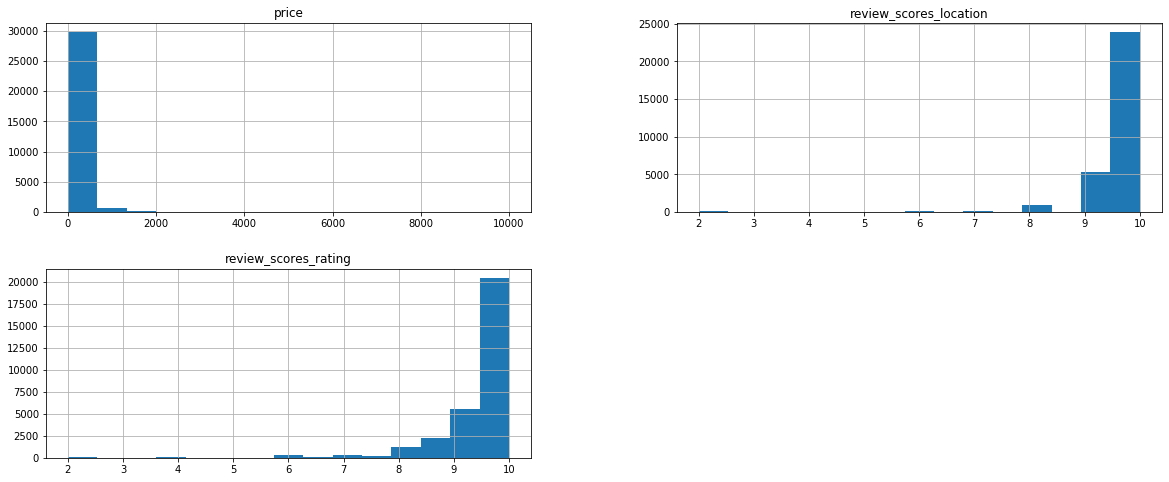

In [22]:
relevant_numeric_features = ['price', 'review_scores_rating', 'review_scores_location']
df_work[relevant_numeric_features].hist(bins=15, figsize=(20,8));

In [23]:
# Statistical summary
df_work[relevant_numeric_features].describe()

,price,review_scores_rating,review_scores_location
count,30609.000000,30609.000000,30609.000000
mean,170.510961,9.435280,9.704433
std,318.259576,0.879945,0.724294
min,0.000000,2.000000,2.000000
25%,69.000000,9.300000,10.000000
50%,105.000000,9.700000,10.000000
75%,178.000000,10.000000,10.000000
max,10000.000000,10.000000,10.000000


With 75% of offers below $178 and prices up to \$10k, we definitely have outliers. 

When it comes to reviews, 75% of overall reviews are rated above 9.3 while 75% of location reviews are rated 10. Does that mean that the vast majority of places are really exceptional? Or do people tend to write reviews only when they liked their stay?

*Writing down a note to do a deeper review analisys in the future.*

#### Dealing with price outliers

In [24]:
# Show number of offers with price above some tresholds 
tresholds = [5000, 2500, 1500, 1000, 500]
for treshold in tresholds:
  print("\nPrice over {}".format(treshold))
  print("{} offers".format(len(df_work[df_work.price > treshold])))
  print("{:.4f}%".format((len(df_work[df_work.price > treshold]) / df_work.shape[0])*100))


Price over 5000
21 offers
0.0686%

Price over 2500
58 offers
0.1895%

Price over 1500
168 offers
0.5489%

Price over 1000
345 offers
1.1271%

Price over 500
1200 offers
3.9204%


I will limit the data with a rent of a maximum of \$1000, which will get rid of the biggest outliers while keeping a few expensives offers (>$500)

In [0]:
price_upper_limit = 1000

In [26]:
# Show number of offers with price below tsome resholds 
tresholds = [10, 25, 50, 100, 200]
for treshold in tresholds:
  print("\nPrice lower than {}".format(treshold))
  print("{} offers".format(len(df_work[df_work.price < treshold])))
  print("{:.4f}%".format((len(df_work[df_work.price < treshold]) / df_work.shape[0])*100))


Price lower than 10
4 offers
0.0131%

Price lower than 25
380 offers
1.2415%

Price lower than 50
3830 offers
12.5127%

Price lower than 100
14083 offers
46.0093%

Price lower than 200
24461 offers
79.9144%


I will limit the data with rent of at least \$25

In [0]:
price_lower_limit = 25

In [0]:
# Dropping prices that are out of chosen limit
df_work.drop(df_work[(df_work.price < price_lower_limit) | (df_work.price > price_upper_limit)].index, axis=0, inplace=True)

Let's take a look at the new dataframe

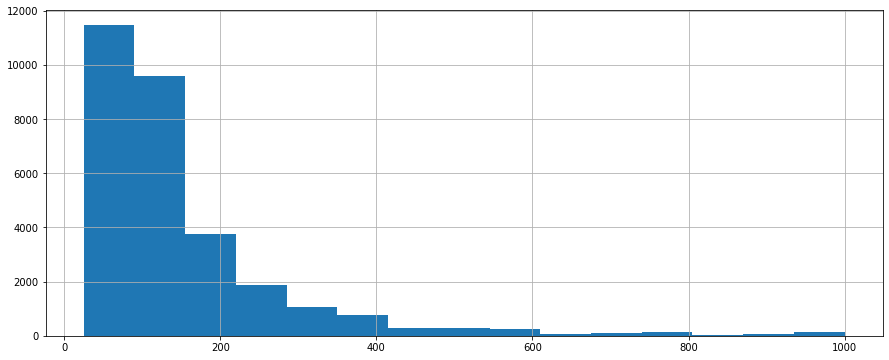

In [29]:
# Plotting the prices in the new dataframe
df_work.price.hist(bins=15, figsize=(15,6));

In [30]:
# Statistical summary
df_work.price.describe()

count    29884.000000
mean       149.204558
std        138.009322
min         25.000000
25%         70.000000
50%        105.000000
75%        175.000000
max       1000.000000
Name: price, dtype: float64

## Analyzing the data

### Location

#### Overview and further clean up

In [31]:
# Counting location values
number_of_neighbourhoods = df_work.neighbourhood_cleansed.value_counts(ascending=True).shape[0]
number_of_neighbourhoods_groups = df_work.neighbourhood_group_cleansed.value_counts(ascending=True).shape[0]
number_of_cities = df_work.city.value_counts(ascending=True).shape[0]

print("There are {} neighbourhoods, {} neighbourhood groups and {} cities in the dataset".format(number_of_neighbourhoods, number_of_neighbourhoods_groups, number_of_cities))

There are 263 neighbourhoods, 3 neighbourhood groups and 367 cities in the dataset


In [32]:
# What are the neighbourhood groups?
df_work.neighbourhood_group_cleansed.value_counts(ascending=True)

Unincorporated Areas     2334
Other Cities            10105
City of Los Angeles     17445
Name: neighbourhood_group_cleansed, dtype: int64

Neighbourhood groups are irrelevant for this analysis. Also I understand neighbourhood give us a better sense of location grouping than city. So I'll be working only with neighbourhoods.

In [33]:
# Dropping unwanted columns and renamig the remaining ones
df_work.drop(columns=['neighbourhood_group_cleansed', 'city'], axis=1, inplace=True)
df_work.rename(columns={'neighbourhood_cleansed':'neighbourhood'}, inplace=True)
df_work.head()

,id,neighbourhood,review_scores_rating,review_scores_location,price
0,109,Culver City,8.0,10.0,122.0
1,344,Burbank,9.7,10.0,168.0
2,2708,Hollywood,9.8,10.0,79.0
3,2732,Santa Monica,9.4,10.0,140.0
5,5728,Del Rey,9.6,10.0,75.0


#### Grouping neighbourhoods

##### Grouping neighbourhoods by number of ads

In [34]:
ads_per_neighbourhoods = df_work.neighbourhood.value_counts(ascending=True)
ads_per_neighbourhoods.shape

(263,)

In [35]:
ads_per_neighbourhoods.describe()

count     263.000000
mean      113.627376
std       215.582944
min         1.000000
25%         9.000000
50%        40.000000
75%       111.500000
max      1662.000000
Name: neighbourhood, dtype: float64

I'll keep only neighbourhoods with at least 30 ads.


In [36]:
# Minimum ads per neighbourhood
minimum_ads_per_neighbourhood = 30

# Get the list of neighbourhoods without minimum number of ads
list_of_neighbourhoods_without_min_ads = ads_per_neighbourhoods[ads_per_neighbourhoods < minimum_ads_per_neighbourhood].index.to_list()
list_of_neighbourhoods_without_min_ads

['Commerce',
 'Hawaiian Gardens',
 'Chatsworth Reservoir',
 'Desert View Highlands',
 'Lake Hughes',
 'Ridge Route',
 'East Compton',
 'South Diamond Bar',
 'Lopez/Kagel Canyons',
 'West Compton',
 'Sepulveda Basin',
 'Bradbury',
 'Rolling Hills',
 'North Whittier',
 'Hasley Canyon',
 'Acton',
 'Harvard Park',
 'Val Verde',
 'Athens',
 'South El Monte',
 'Tujunga Canyons',
 'Vernon',
 'Lake Los Angeles',
 'Santa Fe Springs',
 'Bell Gardens',
 'Northwest Antelope Valley',
 'Watts',
 'East Whittier',
 'Northeast Antelope Valley',
 'Rancho Dominguez',
 'Universal City',
 'Paramount',
 'Lake View Terrace',
 'Arleta',
 'Bell',
 'Leona Valley',
 'Florence',
 'Sun Village',
 'Palos Verdes Estates',
 'Quartz Hill',
 'Vermont Vista',
 'Citrus',
 'Green Meadows',
 'Vincent',
 'Angeles Crest',
 'Rolling Hills Estates',
 'Pacoima',
 'Unincorporated Catalina Island',
 'Charter Oak',
 'Westlake Village',
 'Northwest Palmdale',
 'La Mirada',
 'San Marino',
 'Irwindale',
 'Stevenson Ranch',
 'Veterans

In [0]:
# Remove neighbourhoods without minimum number of ads from series ads_per_neighbourhoods
ads_per_neighbourhoods.drop(labels=list_of_neighbourhoods_without_min_ads, inplace=True)

In [38]:
# Remove neighbourhoods without minimum number of ads from the working dataframe
df_work.drop(df_work.neighbourhood[df_work.neighbourhood.isin(list_of_neighbourhoods_without_min_ads)].index, inplace=True)
df_work.neighbourhood.value_counts(ascending=True).shape

(145,)

In [39]:
# Neighborhoods with less rental offers
ads_per_neighbourhoods[:10]

South San Gabriel       30
Montebello              30
La Canada Flintridge    30
Agoura Hills            33
Signal Hill             34
Wilmington              34
Windsor Square          35
Baldwin Park            37
Chatsworth              37
Adams-Normandie         38
Name: neighbourhood, dtype: int64

In [40]:
# Neighborhoods with more rental offers
ads_per_neighbourhoods[-10:].sort_values(ascending=False)

Venice             1662
Long Beach         1523
Hollywood          1483
Downtown           1070
Santa Monica        982
Hollywood Hills     684
West Hollywood      548
Silver Lake         526
Rowland Heights     505
Westlake            502
Name: neighbourhood, dtype: int64

##### Grouping neighbourhoods by rental price averages

In [41]:
mean_price_per_neighbourhood = df_work.groupby(['neighbourhood']).price.mean().sort_values(ascending=True)
mean_price_per_neighbourhood.shape

(145,)

In [42]:
# Average price per neighbourhood - cheaper
mean_price_per_neighbourhood[:10]

neighbourhood
Lancaster            53.483516
South San Gabriel    55.833333
Palmdale             58.893939
Wilmington           63.029412
Arlington Heights    64.669492
Pico Rivera          69.315789
La Verne             70.500000
Carson               72.676923
North Hills          75.615385
Adams-Normandie      77.500000
Name: price, dtype: float64

In [43]:
# Average price per neighbourhood - most expensive
mean_price_per_neighbourhood[-10:].sort_values(ascending=False)

neighbourhood
Malibu                                   439.467290
Avalon                                   384.038462
Beverly Crest                            362.090909
Hollywood Hills West                     323.922865
Unincorporated Santa Monica Mountains    311.320000
Pacific Palisades                        285.969466
Manhattan Beach                          266.908451
Venice                                   220.839952
Beverly Grove                            220.478261
Hermosa Beach                            217.875969
Name: price, dtype: float64

In [44]:
# Average price per neighbourhood around mean price
mean_price = df_work.price.mean()
mean_price_per_neighbourhood[(mean_price_per_neighbourhood >= mean_price - 10) & (mean_price_per_neighbourhood <= mean_price + 10)]

neighbourhood
Tarzana           140.902655
Valley Village    141.233645
Claremont         143.170213
Larchmont         143.589041
Glendale          144.810345
Hollywood         145.940661
Montebello        146.200000
Granada Hills     146.411765
Culver City       147.534351
Del Rey           148.835443
Silver Lake       149.304183
Altadena          149.668224
Mid-Wilshire      151.010593
Mar Vista         151.306748
Carthay           154.359375
Woodland Hills    157.915709
East Pasadena     158.413793
West Hollywood    159.076642
Redondo Beach     160.830565
Pico-Robertson    160.846154
Name: price, dtype: float64

##### Grouping neighbourhoods by overall review scores averages

In [45]:
avg_review_score_rating_per_neighbourhoods = df_work.groupby(['neighbourhood']).review_scores_rating.mean().sort_values(ascending=True)
avg_review_score_rating_per_neighbourhoods.shape

(145,)

In [46]:
# Neighborhoods with lower average review score
avg_review_score_rating_per_neighbourhoods[:10]

neighbourhood
Exposition Park    8.791954
Avalon             9.073077
Marina del Rey     9.107222
East Hollywood     9.115612
Chinatown          9.132787
Westlake           9.134661
Pico-Robertson     9.135256
Adams-Normandie    9.150000
Koreatown          9.189956
Rowland Heights    9.199208
Name: review_scores_rating, dtype: float64

In [47]:
# Neighborhoods with higher average review score
avg_review_score_rating_per_neighbourhoods[-10:].sort_values(ascending=False)

neighbourhood
Unincorporated Santa Monica Mountains    9.812000
Signal Hill                              9.791176
Topanga                                  9.766667
Montecito Heights                        9.733871
Mount Washington                         9.730000
Agoura Hills                             9.718182
La Canada Flintridge                     9.713333
Toluca Lake                              9.708065
South Pasadena                           9.692754
Playa del Rey                            9.690099
Name: review_scores_rating, dtype: float64

##### Grouping neighbourhoods by location review scores averages

In [48]:
avg_review_score_location_per_neighbourhoods = df_work.groupby(['neighbourhood']).review_scores_location.mean().sort_values(ascending=True)
avg_review_score_location_per_neighbourhoods.shape

(145,)

In [49]:
# Neighborhoods with lower average review score
avg_review_score_location_per_neighbourhoods[:10]

neighbourhood
Wilmington           8.794118
Exposition Park      9.022989
Vermont Square       9.137931
East Los Angeles     9.146789
Pico-Union           9.242718
Lincoln Heights      9.250000
Boyle Heights        9.256098
Jefferson Park       9.256410
Arlington Heights    9.262712
Harvard Heights      9.297619
Name: review_scores_location, dtype: float64

In [50]:
# Neighborhoods with higher average review score
avg_review_score_location_per_neighbourhoods[-10:].sort_values(ascending=False)

neighbourhood
Malibu                                   9.967290
Toluca Lake                              9.951613
Rancho Park                              9.950000
Windsor Square                           9.942857
Unincorporated Santa Monica Mountains    9.940000
Topanga                                  9.935065
La Canada Flintridge                     9.933333
Silver Lake                              9.931559
West Hollywood                           9.914234
Hancock Park                             9.908046
Name: review_scores_location, dtype: float64

##### Combining number of ads, prices and reviews

In [0]:
# Create a new datafram combining number of ads, average price and average review scores
df_neighbourhoods = pd.concat([ads_per_neighbourhoods, mean_price_per_neighbourhood, avg_review_score_rating_per_neighbourhoods, avg_review_score_location_per_neighbourhoods ],  axis=1, sort=True)
df_neighbourhoods.rename(columns={'neighbourhood':'number_of_ads', 'price':'average_price', 'review_scores_rating':'avg_review_rating', 'review_scores_location':'avg_location_review'}, inplace=True)


In [52]:
df_neighbourhoods

,number_of_ads,average_price,avg_review_rating,avg_location_review
Adams-Normandie,38,77.500000,9.150000,9.368421
Agoura Hills,33,131.333333,9.718182,9.878788
Alhambra,284,88.778169,9.450000,9.746479
Altadena,214,149.668224,9.582710,9.808411
Arcadia,176,126.306818,9.355114,9.778409
...,...,...,...,...
Whittier,67,117.388060,9.656716,9.850746
Wilmington,34,63.029412,9.411765,8.794118
Windsor Square,35,165.114286,9.562857,9.942857
Winnetka,62,95.000000,9.611290,9.532258


### Neighbourhood sugestions based on price and reviews

Because this analysis has a focus on location, data has been aggregated by neighbourhood. So I'm giving a little bit more weight for location reviews than overall review, since the later includes, besides location, scores on ad accuracy, cleanliness, checkin procedure, host communication and perceived value.

In [0]:
df_neighbourhoods['weighted_avg_review'] = ((df_neighbourhoods.avg_review_rating * 0.9) + (df_neighbourhoods.avg_location_review * 1.1)) / 2

In [54]:
df_neighbourhoods

,number_of_ads,average_price,avg_review_rating,avg_location_review,weighted_avg_review
Adams-Normandie,38,77.500000,9.150000,9.368421,9.270132
Agoura Hills,33,131.333333,9.718182,9.878788,9.806515
Alhambra,284,88.778169,9.450000,9.746479,9.613063
Altadena,214,149.668224,9.582710,9.808411,9.706846
Arcadia,176,126.306818,9.355114,9.778409,9.587926
...,...,...,...,...,...
Whittier,67,117.388060,9.656716,9.850746,9.763433
Wilmington,34,63.029412,9.411765,8.794118,9.072059
Windsor Square,35,165.114286,9.562857,9.942857,9.771857
Winnetka,62,95.000000,9.611290,9.532258,9.567823


In [55]:
df_neighbourhoods.describe()

,number_of_ads,average_price,avg_review_rating,avg_location_review,weighted_avg_review
count,145.000000,145.000000,145.000000,145.000000,145.000000
mean,197.606897,136.546363,9.476003,9.685736,9.591356
std,262.069258,61.096277,0.172522,0.214663,0.174383
min,30.000000,53.483516,8.791954,8.794118,8.919023
25%,62.000000,97.818841,9.361074,9.548035,9.501059
50%,101.000000,120.750000,9.512154,9.746479,9.626913
75%,237.000000,157.915709,9.605769,9.857143,9.721564
max,1662.000000,439.467290,9.812000,9.967290,9.882400


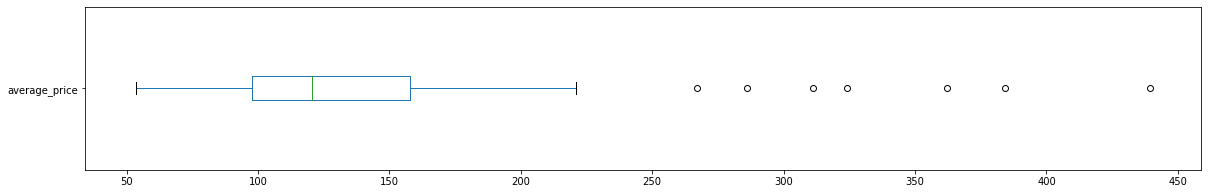

In [56]:
# Visual representation with boxplot
df_neighbourhoods.average_price.plot(kind='box', vert=False, figsize=(20, 3))
plt.show()

In [0]:
# Function to show best reviewed neighbourhoods based on a price range
def get_neighbourhoods(from_price=0, to_price=price_upper_limit, descending=True):
  print ('Best reviewed neighbourhoods from ${} to ${}'.format(from_price, to_price))
  ascending = False if descending else True
  return df_neighbourhoods.loc[df_neighbourhoods.weighted_avg_review[(df_neighbourhoods.average_price > from_price) & (df_neighbourhoods.average_price <= to_price)].sort_values(ascending=ascending).index][:10]

### Are there correlation between price and reviews?

In [58]:
# create a correlation matrix between price and reviews
corr = df_work[['price', 'review_scores_rating', 'review_scores_location']].corr(method='spearman')
corr

,price,review_scores_rating,review_scores_location
price,1.000000,0.075525,0.135719
review_scores_rating,0.075525,1.000000,0.406376
review_scores_location,0.135719,0.406376,1.000000


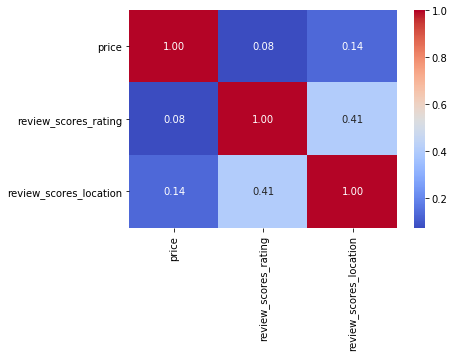

In [59]:
sns.heatmap(corr, cmap='coolwarm', fmt='.2f', linecolor='white', annot=True);

There's no correlation between price and reviews

## Findings


### Average price

In [60]:
print("For the range between ${:.0f} and ${:.0f}, the average price is ${:.2f}".format(df_work.price.min(), df_work.price.max(), df_work.price.mean()))

For the range between $25 and $1000, the average price is $150.88


### Top five neighbourhoods by number of ads

In [0]:
df_neighbourhoods.sort_values(by=['number_of_ads'], ascending=False).head(5)

### Best reviewed neighbourhoods based on price range

I'm chooging the price ranges based on neighbourhoods average price quartiles (see boxplot)

In [61]:
# Best reviewed neighbourhood up to $100
get_neighbourhoods(to_price=100)

Best reviewed neighbourhoods from $0 to $100


,number_of_ads,average_price,avg_review_rating,avg_location_review,weighted_avg_review
Covina,40,78.200000,9.575000,9.875000,9.740000
Downey,65,77.723077,9.606154,9.784615,9.704308
East San Gabriel,77,85.376623,9.541558,9.831169,9.700844
La Verne,42,70.500000,9.454762,9.880952,9.689167
Lancaster,91,53.483516,9.550549,9.758242,9.664780
West Covina,98,85.897959,9.536735,9.744898,9.651224
Carson,65,72.676923,9.653846,9.630769,9.641154
Alhambra,284,88.778169,9.450000,9.746479,9.613063
El Sereno,64,98.140625,9.678125,9.546875,9.605938
Pico Rivera,38,69.315789,9.626316,9.578947,9.600263


In [62]:
# Best reviewed neighbourhood between $100 and $120
get_neighbourhoods(from_price=100, to_price=120)

Best reviewed neighbourhoods from $100 to $120


,number_of_ads,average_price,avg_review_rating,avg_location_review,weighted_avg_review
Mount Washington,110,118.300000,9.730000,9.863636,9.803500
Del Aire,53,108.056604,9.666038,9.886792,9.787453
Whittier,67,117.388060,9.656716,9.850746,9.763433
Santa Clarita,119,115.184874,9.625210,9.865546,9.757395
Glassell Park,76,106.144737,9.689474,9.789474,9.744474
Chatsworth,37,116.162162,9.637838,9.810811,9.732973
Burbank,341,117.533724,9.568622,9.844575,9.720396
Azusa,59,115.033898,9.655932,9.762712,9.714661
Montecito Heights,62,115.225806,9.733871,9.693548,9.711694
Highland Park,196,106.673469,9.636224,9.755102,9.701607


In [63]:
# Best reviewed neighbourhood between $120 and $160
get_neighbourhoods(from_price=120, to_price=160)

Best reviewed neighbourhoods from $120 to $160


,number_of_ads,average_price,avg_review_rating,avg_location_review,weighted_avg_review
Signal Hill,34,126.441176,9.791176,9.882353,9.841324
Silver Lake,526,149.304183,9.677186,9.931559,9.817091
Agoura Hills,33,131.333333,9.718182,9.878788,9.806515
Rancho Park,40,134.250000,9.617500,9.950000,9.800375
Pasadena,449,136.590200,9.666592,9.875278,9.781370
Calabasas,49,136.693878,9.618367,9.897959,9.772143
Eagle Rock,140,132.157143,9.634286,9.857143,9.756857
Echo Park,413,126.740920,9.637530,9.849879,9.754322
Valley Village,107,141.233645,9.667290,9.813084,9.747477
West Hollywood,548,159.076642,9.541606,9.914234,9.746551


In [64]:
# Best reviewed neighbourhood between $160 and $250
get_neighbourhoods(from_price=160, to_price=250)

Best reviewed neighbourhoods from $160 to $250


,number_of_ads,average_price,avg_review_rating,avg_location_review,weighted_avg_review
Topanga,231,217.502165,9.766667,9.935065,9.859286
Toluca Lake,62,165.000000,9.708065,9.951613,9.842016
La Canada Flintridge,30,197.566667,9.713333,9.933333,9.834333
Playa del Rey,101,202.445545,9.690099,9.871287,9.789752
South Pasadena,69,178.507246,9.692754,9.840580,9.774058
Windsor Square,35,165.114286,9.562857,9.942857,9.771857
Studio City,312,198.256410,9.623718,9.881410,9.765449
Redondo Beach,301,160.830565,9.624917,9.857143,9.752641
Ladera Heights,52,193.788462,9.605769,9.865385,9.748558
Hermosa Beach,129,217.875969,9.555039,9.875969,9.731550


In [65]:
# Best reviewed neighbourhood starting on $250
get_neighbourhoods(from_price=250)

Best reviewed neighbourhoods from $250 to $1000


,number_of_ads,average_price,avg_review_rating,avg_location_review,weighted_avg_review
Unincorporated Santa Monica Mountains,100,311.320000,9.812000,9.940000,9.882400
Malibu,214,439.467290,9.679907,9.967290,9.837967
Pacific Palisades,131,285.969466,9.581679,9.877863,9.744580
Hollywood Hills West,363,323.922865,9.573003,9.870523,9.736639
Beverly Crest,66,362.090909,9.560606,9.878788,9.735606
Manhattan Beach,142,266.908451,9.508451,9.823944,9.681972
Avalon,78,384.038462,9.073077,9.653846,9.392500


In [66]:
 # Best reviewed neighbourhood for any price
get_neighbourhoods()

Best reviewed neighbourhoods from $0 to $1000


,number_of_ads,average_price,avg_review_rating,avg_location_review,weighted_avg_review
Unincorporated Santa Monica Mountains,100,311.320000,9.812000,9.940000,9.882400
Topanga,231,217.502165,9.766667,9.935065,9.859286
Toluca Lake,62,165.000000,9.708065,9.951613,9.842016
Signal Hill,34,126.441176,9.791176,9.882353,9.841324
Malibu,214,439.467290,9.679907,9.967290,9.837967
La Canada Flintridge,30,197.566667,9.713333,9.933333,9.834333
Silver Lake,526,149.304183,9.677186,9.931559,9.817091
Agoura Hills,33,131.333333,9.718182,9.878788,9.806515
Mount Washington,110,118.300000,9.730000,9.863636,9.803500
Rancho Park,40,134.250000,9.617500,9.950000,9.800375
